<a href="https://colab.research.google.com/github/prithvikolla/GitHub_Repository_Analysis/blob/main/GRA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import io

import requests

urlfile="https://raw.githubusercontent.com/prithvikolla/GitHub_Repository_Analysis/main/2015-01-01-0.csv"

url=requests.get(urlfile).content

df_GRA =pd.read_csv(io.StringIO(url.decode('utf-8')))


In [2]:
df_GRA.head()

,id,type,actor.id,actor.login,actor.gravatar_id,actor.url,actor.avatar_url,repo.id,repo.name,repo.url,payload.push_id,payload.size,payload.distinct_size,payload.ref,payload.head,payload.before,payload.commits,payload.ref_type,payload.master_branch,payload.description,payload.pusher_type,payload.action,payload.issue.url,payload.issue.labels_url,payload.issue.comments_url,payload.issue.events_url,payload.issue.html_url,payload.issue.id,payload.issue.number,payload.issue.title,payload.issue.user.login,payload.issue.user.id,payload.issue.user.avatar_url,payload.issue.user.gravatar_id,payload.issue.user.url,payload.issue.user.html_url,payload.issue.user.followers_url,payload.issue.user.following_url,payload.issue.user.gists_url,payload.issue.user.starred_url,...,payload.pull_request.head.user.url,payload.pull_request.head.user.html_url,payload.pull_request.head.user.followers_url,payload.pull_request.head.user.following_url,payload.pull_request.head.user.gists_url,payload.pull_request.head.user.starred_url,payload.pull_request.head.user.subscriptions_url,payload.pull_request.head.user.organizations_url,payload.pull_request.head.user.repos_url,payload.pull_request.head.user.events_url,payload.pull_request.head.user.received_events_url,payload.pull_request.head.user.type,payload.pull_request.head.user.site_admin,payload.pull_request.head.repo.id,payload.pull_request.head.repo.name,payload.pull_request.head.repo.full_name,payload.pull_request.head.repo.owner.login,payload.pull_request.head.repo.owner.id,payload.pull_request.head.repo.owner.avatar_url,payload.pull_request.head.repo.owner.gravatar_id,payload.pull_request.head.repo.owner.url,payload.pull_request.head.repo.owner.html_url,payload.pull_request.head.repo.owner.followers_url,payload.pull_request.head.repo.owner.following_url,payload.pull_request.head.repo.owner.gists_url,payload.pull_request.head.repo.owner.starred_url,payload.pull_request.head.repo.owner.subscriptions_url,payload.pull_request.head.repo.owner.organizations_url,payload.pull_request.head.repo.owner.repos_url,payload.pull_request.head.repo.owner.events_url,payload.pull_request.head.repo.owner.received_events_url,payload.pull_request.head.repo.owner.type,payload.pull_request.head.repo.owner.site_admin,public,created_at,org.id,org.login,org.gravatar_id,org.url,org.avatar_url
0,2489368070,PushEvent,9152315,davidjhulse,NaN,https://api.github.com/users/davidjhulse,https://avatars.githubusercontent.com/u/9152315?,28635890,davidjhulse/davesbingrewardsbot,https://api.github.com/repos/davidjhulse/daves...,536740396,1,1,refs/heads/master,a9b22a6d80c1e0bb49c1cf75a3c075b642c28f81,86ffa724b4d70fce46e760f8cc080f5ec3d7d85f,"[{""author"":{""email"":""da8d7d1118ca5befd4d0d3e4f...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",...,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",True,2015-01-01T00:00:00Z,"""""","""""","""""","""""",""""""
1,2489368072,PushEvent,5581438,jmoon018,NaN,https://api.github.com/users/jmoon018,https://avatars.githubusercontent.com/u/5581438?,26392647,jmoon018/rshell-unit-tester,https://api.github.com/repos/jmoon018/rshell-u...,536740397,1,1,refs/heads/master,56688cc528224d40679b7e83c105b27367443a8c,d5a69a84e4d95c1c2cbc0a828172f9ce94db35c6,"[{""author"":{""email"":""61dcbbf08c9f7aaa2b1d0a9ce...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",...,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",True,2015-01-01T00:00:00Z,""""

In [3]:
df_GRA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7702 entries, 0 to 7701
Columns: 182 entries, id to org.avatar_url
dtypes: bool(1), float64(1), int64(3), object(177)
memory usage: 10.6+ MB


In [4]:
unique_actors = list (df_GRA['actor.login'].unique())

In [5]:
len(unique_actors)

3648

In [6]:
len(df_GRA['actor.id'].unique())

3648

1. How many unique contributors for each group?

- Contributors can be inferred as , users who have done push event and finding the distinct users by "actor.id" attribute and "type" attribute.

In [7]:
id = [ ]
for i in range(len(df_GRA['type'])): 
  if (df_GRA['type'][i] == 'PushEvent'):
    id.append(df_GRA['actor.id'][i])

In [8]:
def uniq(input):
  output = [ ]
  for x in input:
    if x not in output:
      output.append(x)
  return output
id_unique = uniq(input = id)

In [9]:
len(id_unique)

2327

In [10]:
print(len(id) == len(id_unique))

False


hence, all the push events done have same user contributing multiple times

- so, number of unique contributions are 2327 by the analysis done till now.

2. What's the distribution of the number of contributors among the all projects here? 
 - what is the mean?
 - what is the standard deviation? 
 - Is it a normal distribution?

In [11]:
from nltk import Counter

In [12]:
event_Count = Counter(df_GRA['type'])

In [13]:
event_Count.most_common()

[('PushEvent', 4280),
 ('CreateEvent', 815),
 ('IssueCommentEvent', 650),
 ('WatchEvent', 642),
 ('IssuesEvent', 373),
 ('PullRequestEvent', 315),
 ('ForkEvent', 213),
 ('DeleteEvent', 141),
 ('GollumEvent', 90),
 ('PullRequestReviewCommentEvent', 85),
 ('CommitCommentEvent', 56),
 ('ReleaseEvent', 24),
 ('MemberEvent', 16),
 ('PublicEvent', 2)]

As we can see,In the top 3 common events done in Github. We find that users did largely "Push Event" and the second one is "Create Event"

In [14]:
#Check wether we have entire columns in the whole data set with null data.
null_data = pd.DataFrame()
for i in df_GRA.columns:
  if (len(df_GRA[i])== 0):
    null_data.insert(0,i,df_GRA[i])

In [15]:
len(null_data)
## No we do not have entire data columns in the whole data set with null values.

0

In [16]:
user_ID = [ ]
repo_ID = [ ]
for i in range(len(df_GRA)):
 if (df_GRA['type'][i] == 'PushEvent'):
   user_ID.append(df_GRA['actor.id'][i])
   repo_ID.append(df_GRA['repo.id'][i])
import matplotlib.pyplot as plt
from nltk import Counter
count_ID = Counter(user_ID)
top_10_ID  = count_ID.most_common(10)

In [17]:
top_10_ID[:3]

[(280212, 79), (2033581, 42), (367618, 35)]

In [18]:
dicti_ry = {k: v for k, v in top_10_ID}

In [19]:
list_Top10_User = pd.DataFrame({'top10_userID': list (dicti_ry.keys()),'Num_PusEve' :  list (dicti_ry.values())})


The above result shows the top 10 users who contributed for all the projects

In [20]:
list_Top10_User

,top10_userID,Num_PusEve
0,280212,79
1,2033581,42
2,367618,35
3,9201970,29
4,6158630,24
5,9452791,24
6,1684950,20
7,1181205,18
8,6214365,18
9,50891,15


In [21]:

df_Push = df_GRA[df_GRA['type'] == 'PushEvent']

In [22]:
group = df_Push.groupby('actor.id')
df_u = group.apply(lambda x: x['repo.id'].unique())

In [23]:
my_li = list (set(df_Push['actor.id']))

In [24]:
df_u

actor.id
7                       [538746]
137                   [28648528]
375         [28546246, 28574862]
1106                   [2393766]
1377                  [28646975]
                    ...         
10361273              [28677442]
10361298              [28677764]
10361312              [28677674]
10361315              [28677587]
10361338              [28677651]
Length: 2327, dtype: object

In [25]:
val = [x for x in df_u]

In [26]:
li = pd.DataFrame({'user_push': sorted(my_li),'rep_user':val})

In [27]:
li.head()

,user_push,rep_user
0,7,[538746]
1,137,[28648528]
2,375,"[28546246, 28574862]"
3,1106,[2393766]
4,1377,[28646975]


In [28]:
arr = [ ]
for i in range(len(list_Top10_User)):
  for j in range(len(li)):
    if (list_Top10_User['top10_userID'][i] == li['user_push'][j]):
       arr.append(li['rep_user'][j])


In [29]:
arr

[array([21481110]),
 array([6058151, 6058123, 6058234, 6031942]),
 array([  756568,   860274, 14148013, 11673915,   747311,   779156,
         6485371, 23811389,   756841,  2387146,  2387049,  5054494,
        10040198, 10038467,  6756500, 10039899,  8694598, 11672686,
        26532168, 16819408,  6756503]),
 array([25173910]),
 array([18126008, 15100395]),
 array([28676949, 28677711, 25941039, 26978339, 25940223]),
 array([28650038]),
 array([28657751]),
 array([28669435]),
 array([28677563, 23131813, 26407499])]

In [30]:
list_Top10_User['rep_pushOcc'] = arr
list_Top10_User['rep_Count'] = list_Top10_User['rep_pushOcc'].apply(lambda x: len(x))

In [31]:
list_Top10_User

,top10_userID,Num_PusEve,rep_pushOcc,rep_Count
0,280212,79,[21481110],1
1,2033581,42,"[6058151, 6058123, 6058234, 6031942]",4
2,367618,35,"[756568, 860274, 14148013, 11673915, 747311, 7...",21
3,9201970,29,[25173910],1
4,6158630,24,"[18126008, 15100395]",2
5,9452791,24,"[28676949, 28677711, 25941039, 26978339, 25940...",5
6,1684950,20,[28650038],1
7,1181205,18,[28657751],1
8,6214365,18,[28669435],1
9,50891,15,"[28677563, 23131813, 26407499]",3


From the above table I wanted to show the top 10 contributors and how many projects they were working on.

we see that,

1. user: 367618 was working parallely in more than 20 projects.
2. user: 28021 worked only on one project and even though push events performed are highest, we cannot conclude that he is the highest contributor among the 10 without considering other factors like length of code contributed per push event.

In [32]:
li['rep_Count'] = li['rep_user'].apply(lambda x: len(x))

In [33]:
li.head()

,user_push,rep_user,rep_Count
0,7,[538746],1
1,137,[28648528],1
2,375,"[28546246, 28574862]",2
3,1106,[2393766],1
4,1377,[28646975],1


{'boxes': [<matplotlib.lines.Line2D at 0x7fa9ff072470>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa9ff072e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa9ff086940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa9ff0865c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa9ff072780>,
  <matplotlib.lines.Line2D at 0x7fa9ff072b00>]}

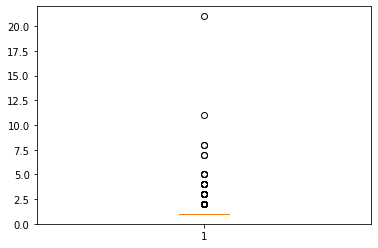

In [34]:
plt.boxplot(li['rep_Count'])

In [35]:
df_GRA['payload.commits'][0].replace('[','').replace(']','').replace('{','').replace('}','').replace('"','').replace('\\n',' ')

'author:email:da8d7d1118ca5befd4d0d3e4f449c76ba6f1ee7e@live.com,name:davidjhulse,distinct:true,message:Altered BingBot.jar  Fixed issue with multiple account support,sha:a9b22a6d80c1e0bb49c1cf75a3c075b642c28f81,url:https://api.github.com/repos/davidjhulse/davesbingrewardsbot/commits/a9b22a6d80c1e0bb49c1cf75a3c075b642c28f81'

In [36]:
df_GRA['payload.commits'][0]

'[{"author":{"email":"da8d7d1118ca5befd4d0d3e4f449c76ba6f1ee7e@live.com","name":"davidjhulse"},"distinct":true,"message":"Altered BingBot.jar\\n\\nFixed issue with multiple account support","sha":"a9b22a6d80c1e0bb49c1cf75a3c075b642c28f81","url":"https://api.github.com/repos/davidjhulse/davesbingrewardsbot/commits/a9b22a6d80c1e0bb49c1cf75a3c075b642c28f81"}]'

In [37]:
df_Push_copy = df_Push.copy()

In [38]:
df_Push_copy = df_Push_copy[["actor.id","repo.id"]]

In [39]:
df_Push_copy.head()

,actor.id,repo.id
0,9152315,28635890
1,5581438,26392647
3,66577,5152285
4,9221683,28520835
5,1174658,25334511


In [40]:
l = df_Push_copy.groupby("repo.id")["actor.id"].count()
l.head()

repo.id
13803     1
20724     1
100181    1
115984    1
117358    1
Name: actor.id, dtype: int64

In [41]:
print(len(df_Push_copy['repo.id']))
print(len(df_Push_copy['repo.id'].unique()))

4280
2558


In [42]:
df_push_unique = pd.DataFrame({'rep.id': sorted(df_Push_copy['repo.id'].unique()),'contrib_coun': [i for i in l]})

In [43]:
df_push_unique.head()

,rep.id,contrib_coun
0,13803,1
1,20724,1
2,100181,1
3,115984,1
4,117358,1


In [44]:
df_push_unique.to_csv('Q1.csv')

In [45]:
rep_PushGroup_Count = df_push_unique['contrib_coun'].value_counts()

In [46]:
for i in rep_PushGroup_Count:
  print(i)

1776
460
155
70
34
19
12
8
6
6
3
2
2
1
1
1
1
1


In [47]:
rep_PushGroup_Count

1     1776
2      460
3      155
4       70
5       34
6       19
8       12
7        8
12       6
9        6
18       3
13       2
14       2
79       1
20       1
29       1
11       1
30       1
Name: contrib_coun, dtype: int64

In [48]:
unique_repGroup = df_push_unique['contrib_coun'].unique()

In [49]:
sorted(unique_repGroup)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 29, 30, 79]

Text(0, 0.5, 'Number of Repositories')

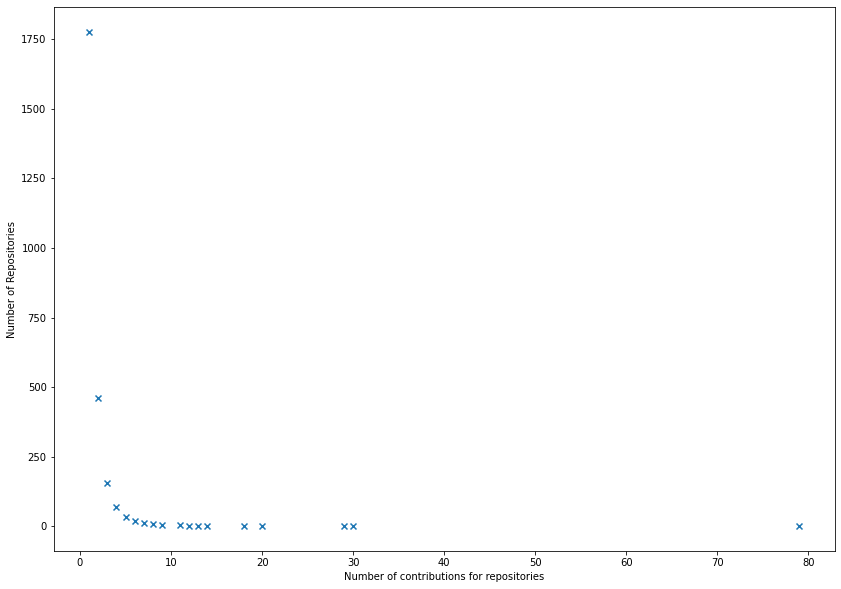

In [50]:
plt.figure(figsize=(14,10))
plt.scatter(x = sorted(unique_repGroup),y = rep_PushGroup_Count,marker="x")
plt.xlabel('Number of contributions for repositories')
plt.ylabel('Number of Repositories')

In [51]:
dataFS = pd.read_csv('/content/searchrepo.csv')

In [52]:
df_GRA['actor.login'].head()

0           davidjhulse
1              jmoon018
2    christoferpeterson
3           JakeWharton
4              git4ruby
Name: actor.login, dtype: object

In [53]:
dataFS['Users'].head()
print(len(dataFS['Users']))

26899


In [54]:
same = [i for i in dataFS['Users'] if i in df_GRA['actor.login']]

In [55]:
count = [ ]
for i in dataFS['Users']:
  for j in df_GRA['actor.login']:
    if (i == j):
       count.append(j)

In [56]:
unique_list = [ ]
for i in count: 
   if i not in unique_list:
     unique_list.append(i)

In [57]:
unique_list

['backbone', 'thor', 'hubot', 'catbox', 'mimosa']

The above users with multiple repositories and also same name with different orientations.

In [58]:
df_Push

,id,type,actor.id,actor.login,actor.gravatar_id,actor.url,actor.avatar_url,repo.id,repo.name,repo.url,payload.push_id,payload.size,payload.distinct_size,payload.ref,payload.head,payload.before,payload.commits,payload.ref_type,payload.master_branch,payload.description,payload.pusher_type,payload.action,payload.issue.url,payload.issue.labels_url,payload.issue.comments_url,payload.issue.events_url,payload.issue.html_url,payload.issue.id,payload.issue.number,payload.issue.title,payload.issue.user.login,payload.issue.user.id,payload.issue.user.avatar_url,payload.issue.user.gravatar_id,payload.issue.user.url,payload.issue.user.html_url,payload.issue.user.followers_url,payload.issue.user.following_url,payload.issue.user.gists_url,payload.issue.user.starred_url,...,payload.pull_request.head.user.url,payload.pull_request.head.user.html_url,payload.pull_request.head.user.followers_url,payload.pull_request.head.user.following_url,payload.pull_request.head.user.gists_url,payload.pull_request.head.user.starred_url,payload.pull_request.head.user.subscriptions_url,payload.pull_request.head.user.organizations_url,payload.pull_request.head.user.repos_url,payload.pull_request.head.user.events_url,payload.pull_request.head.user.received_events_url,payload.pull_request.head.user.type,payload.pull_request.head.user.site_admin,payload.pull_request.head.repo.id,payload.pull_request.head.repo.name,payload.pull_request.head.repo.full_name,payload.pull_request.head.repo.owner.login,payload.pull_request.head.repo.owner.id,payload.pull_request.head.repo.owner.avatar_url,payload.pull_request.head.repo.owner.gravatar_id,payload.pull_request.head.repo.owner.url,payload.pull_request.head.repo.owner.html_url,payload.pull_request.head.repo.owner.followers_url,payload.pull_request.head.repo.owner.following_url,payload.pull_request.head.repo.owner.gists_url,payload.pull_request.head.repo.owner.starred_url,payload.pull_request.head.repo.owner.subscriptions_url,payload.pull_request.head.repo.owner.organizations_url,payload.pull_request.head.repo.owner.repos_url,payload.pull_request.head.repo.owner.events_url,payload.pull_request.head.repo.owner.received_events_url,payload.pull_request.head.repo.owner.type,payload.pull_request.head.repo.owner.site_admin,public,created_at,org.id,org.login,org.gravatar_id,org.url,org.avatar_url
0,2489368070,PushEvent,9152315,davidjhulse,NaN,https://api.github.com/users/davidjhulse,https://avatars.githubusercontent.com/u/9152315?,28635890,davidjhulse/davesbingrewardsbot,https://api.github.com/repos/davidjhulse/daves...,536740396,1,1,refs/heads/master,a9b22a6d80c1e0bb49c1cf75a3c075b642c28f81,86ffa724b4d70fce46e760f8cc080f5ec3d7d85f,"[{""author"":{""email"":""da8d7d1118ca5befd4d0d3e4f...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",...,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",True,2015-01-01T00:00:00Z,"""""","""""","""""","""""",""""""
1,2489368072,PushEvent,5581438,jmoon018,NaN,https://api.github.com/users/jmoon018,https://avatars.githubusercontent.com/u/5581438?,26392647,jmoon018/rshell-unit-tester,https://api.github.com/repos/jmoon018/rshell-u...,536740397,1,1,refs/heads/master,56688cc528224d40679b7e83c105b27367443a8c,d5a69a84e4d95c1c2cbc0a828172f9ce94db35c6,"[{""author"":{""email"":""61dcbbf08c9f7aaa2b1d0a9ce...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",...,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",True,2015-01-01T00:00:00Z,""""

In [59]:
df_Push_copy.to_csv('question2.csv')

In [60]:
s=df_Push_copy.assign(count=1).groupby(['actor.id','repo.id']).agg({'count':'sum'}).reset_index()

In [61]:
s.to_csv('question2refine.csv')

In [62]:
s['count'].value_counts()

1     1817
2      453
3      155
4       68
5       33
6       18
8       11
7        8
12       6
9        6
18       3
13       2
14       2
79       1
20       1
29       1
11       1
30       1
Name: count, dtype: int64

In [63]:
j = pd.read_csv('/content/Q2&1.csv')

In [64]:
j.head()

,unique_rep,Contributors,Total Push events,Users:,9152315,5581438,66577,9221683,1174658,2875833,1317792,1373703,2676867,5545980,4070158,3495129,4443263,21826,2112033,1987779,1014189,372245,1106706,5563373,227042,6158630,406946,926454,1256464,4447136,8526819,922837,429529,3960243,8147971,8770348,9201970,2318343,4102215,210848,...,6298185,1442822,4153853,5962998,8658234,5206088,6081541,2293544,7297775,1625941,5262037,1235097,1471504,338734,422381,5136633,7299909,4580292,8633,8289,8819701,8987245,10274077,8263721,790500,171043,6189538,3964764,2188638,6227836,8548034,2192930,1301018,5881611,69068,3413206,1280779,501642,3656079,3867941
0,28635890,1,2,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26392647,1,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5152285,1,9,NaN,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28520835,1,2,NaN,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25334511,1,1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
q1_uni_con = j['Contributors'].unique()

<Figure size 720x720 with 0 Axes>

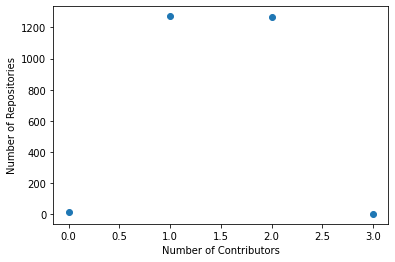

<Figure size 720x720 with 0 Axes>

In [66]:
plt.scatter(q1_uni_con,j['Contributors'].value_counts())
plt.xlabel('Number of Contributors')
plt.ylabel('Number of Repositories')
plt.figure(figsize=(10,10))